# Bank Marketing

The binary classification goal is to predict if the client will subscribe a bank term deposit. column y

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
df = pd.read_csv("bank-additional-full.csv", sep=";")
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape

(41188, 21)

In [6]:
with open('bank-additional-names.txt', 'r') as names:
    print(names.read())
    names.close()

ï»¿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: SÃ©rgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   T

#### Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is a possibility of missing values in some categorical attributes, but are named "unknown". To get them we have to rename them

In [8]:
df.replace('unknown', np.NaN, inplace=True)

In [9]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Basing on the fact that the dataset is abit huge, I will drop the null values.

In [10]:
df.dropna(inplace = True)

Checking and droping duplicates is any

In [11]:
#Checking for duplicates
df.duplicated().sum()

10

In [12]:
#Drop duplicates
df.drop_duplicates(keep = "first", inplace = True)

In [13]:
# Number of distinct values in variables
for i, column in enumerate(df.columns):
    print("{}. ".format(i) + str(column.title()) + ": {}". format(df[column].nunique()))

0. Age: 76
1. Job: 11
2. Marital: 3
3. Education: 7
4. Default: 2
5. Housing: 2
6. Loan: 2
7. Contact: 2
8. Month: 10
9. Day_Of_Week: 5
10. Duration: 1441
11. Campaign: 41
12. Pdays: 26
13. Previous: 8
14. Poutcome: 3
15. Emp.Var.Rate: 10
16. Cons.Price.Idx: 26
17. Cons.Conf.Idx: 26
18. Euribor3M: 314
19. Nr.Employed: 11
20. Y: 2


In [14]:
#Classifying the variables in numerical and categorical
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]

## Explanatory Analysis

#### 1. Univariate Analysis

##### Categorical Variables

In [15]:
sns.set_theme(style="darkgrid")

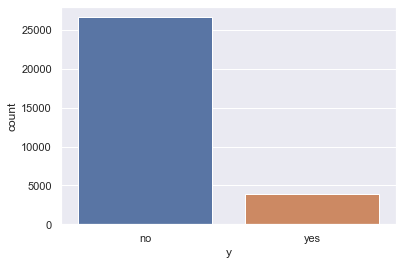

In [16]:
ax = sns.countplot(x = df["y"])
plt.show()

In [17]:
# The target variable is imbalanced

Job


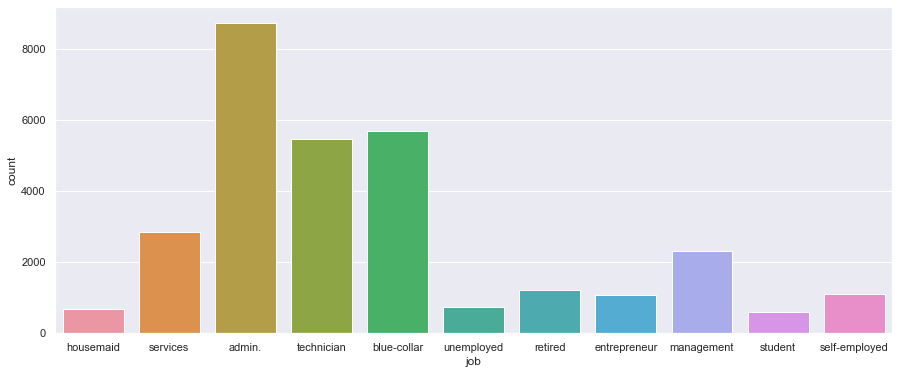

Marital


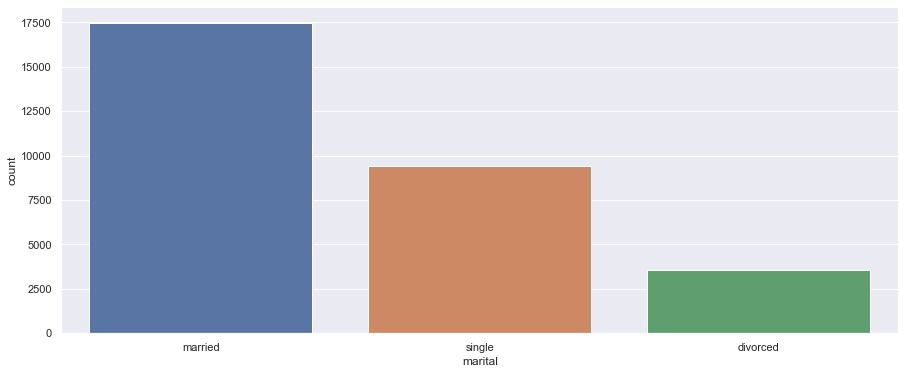

Education


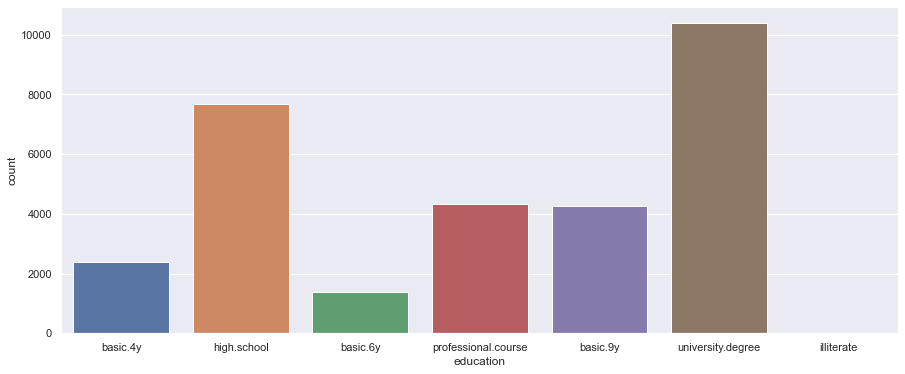

Default


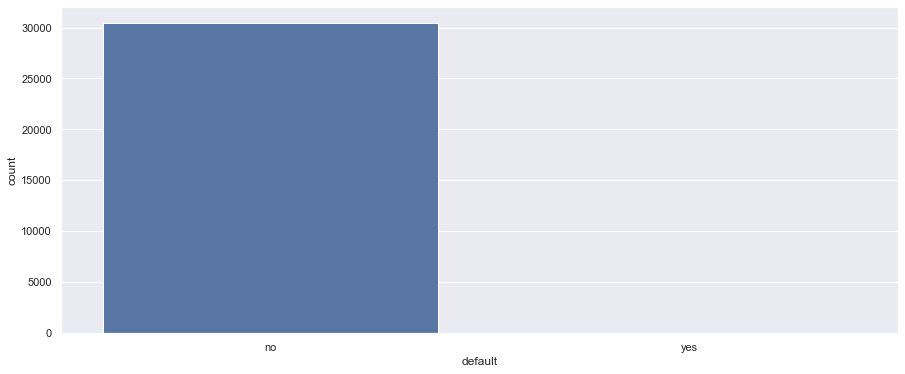

Housing


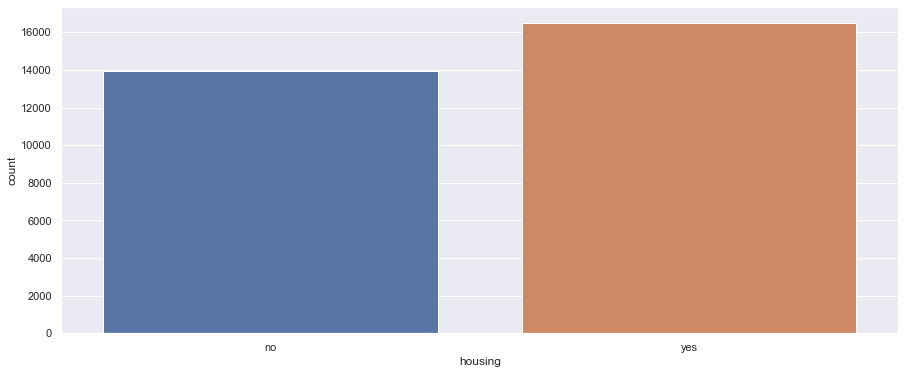

Loan


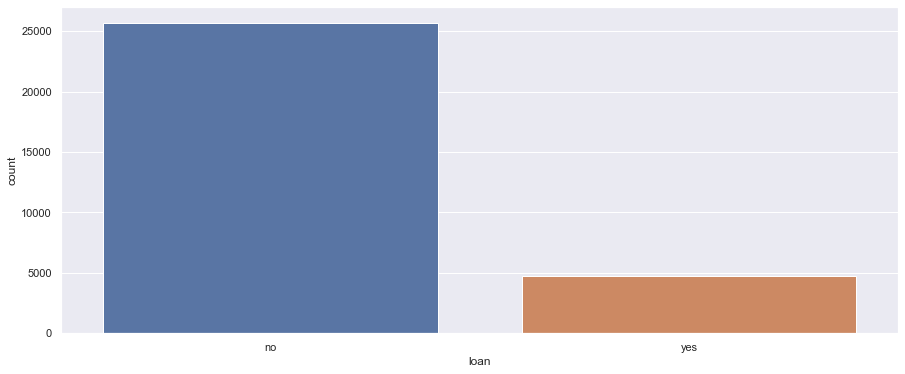

Contact


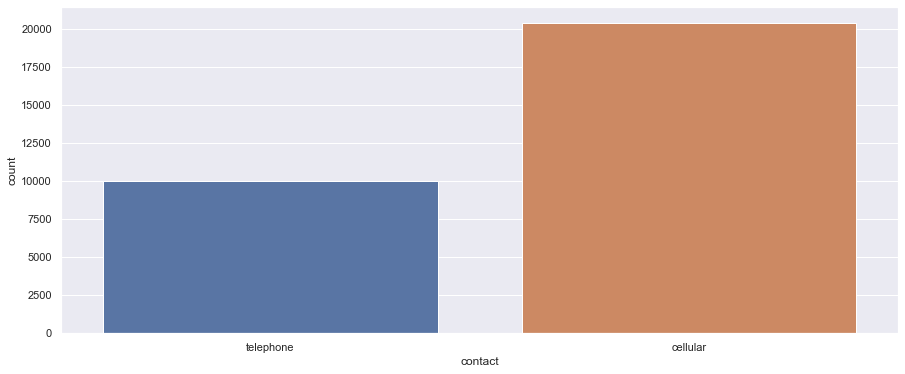

Month


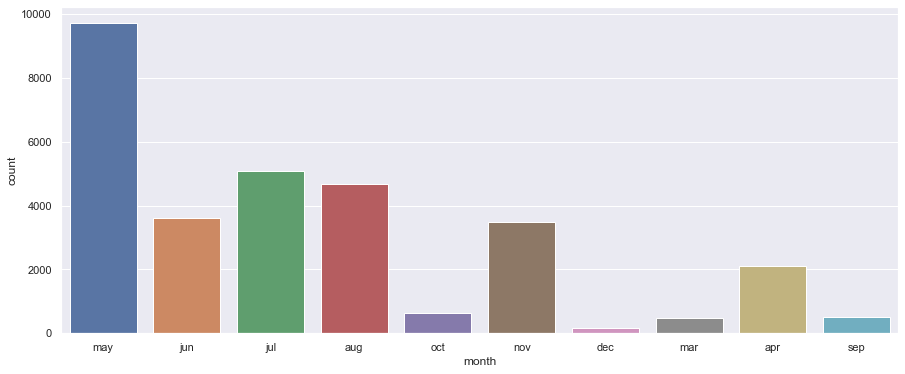

Day_Of_Week


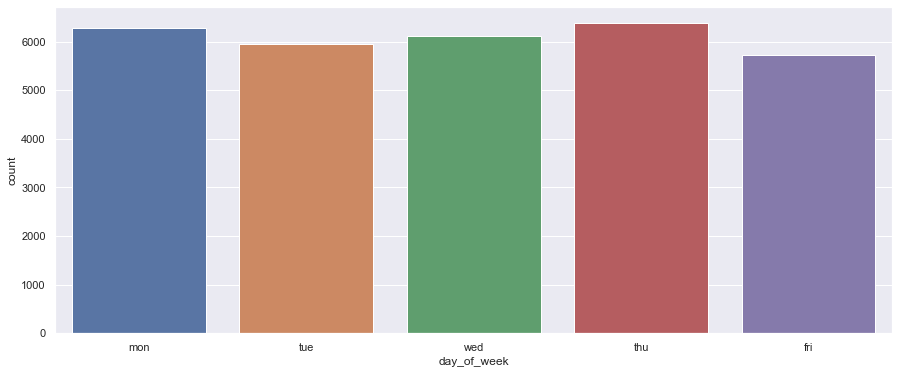

Poutcome


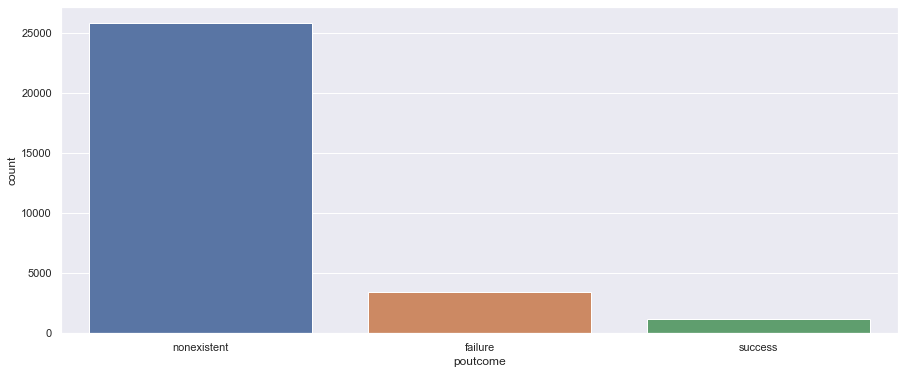

In [18]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column])
    plt.show()

Job


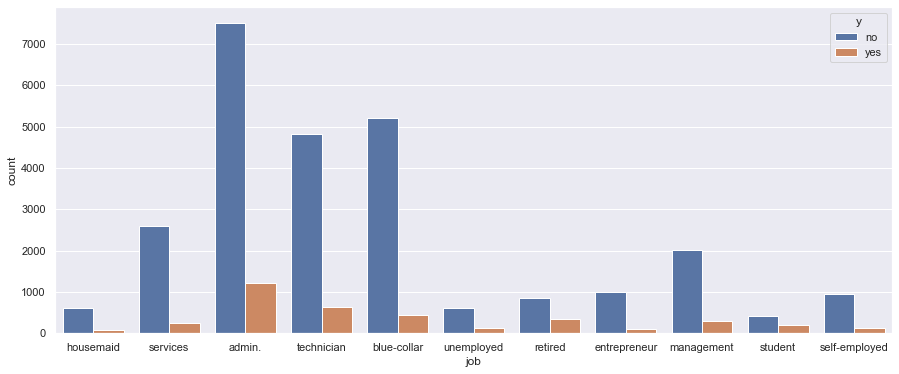

Marital


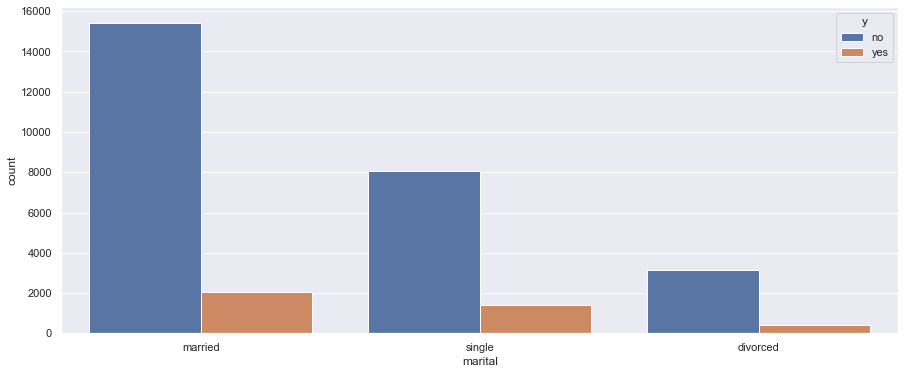

Education


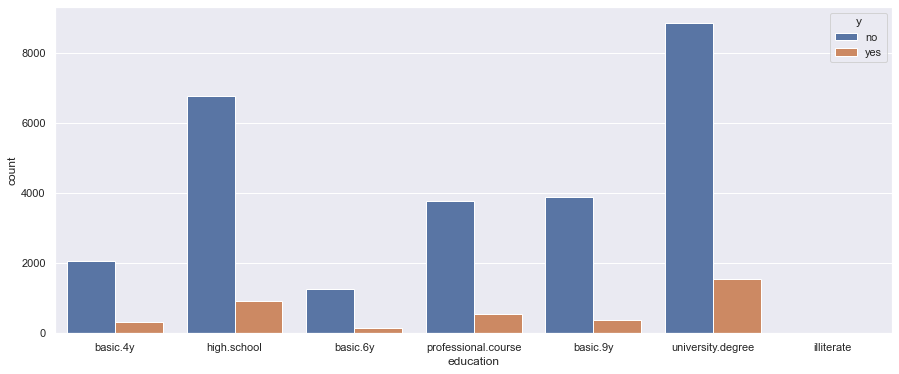

Default


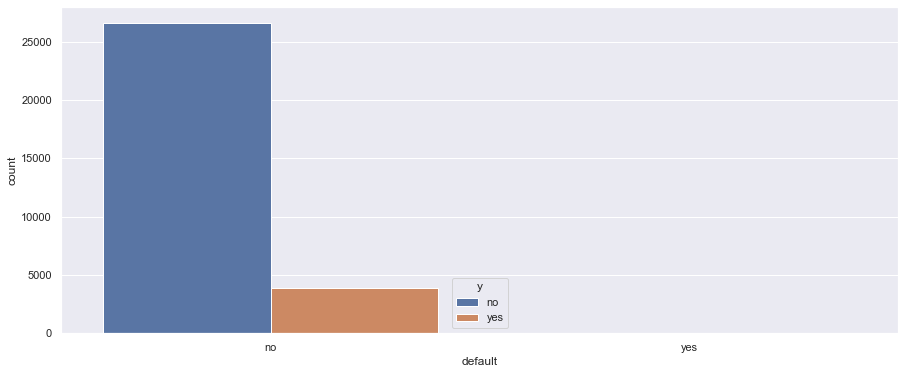

Housing


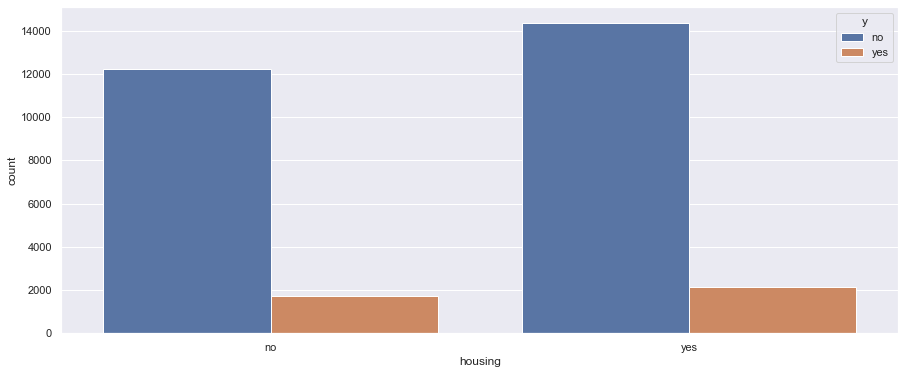

Loan


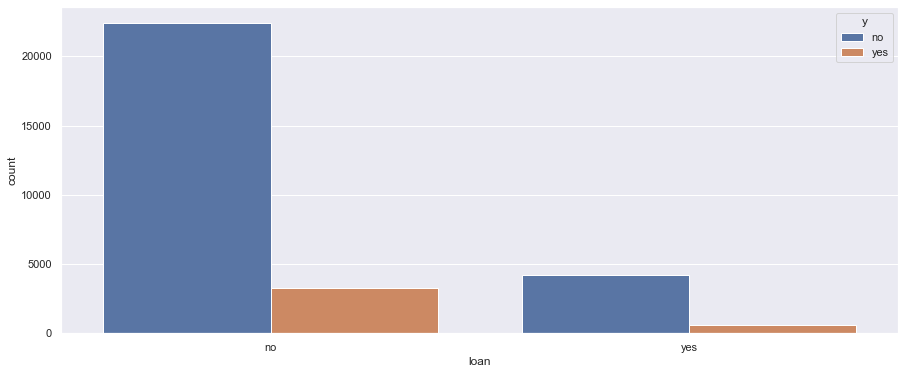

Contact


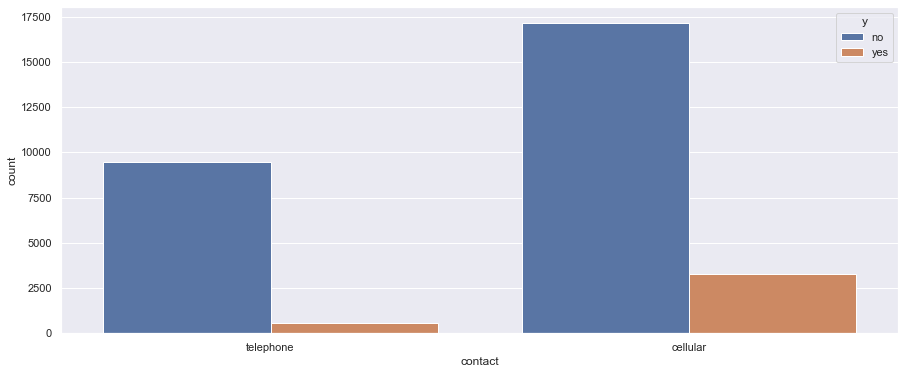

Month


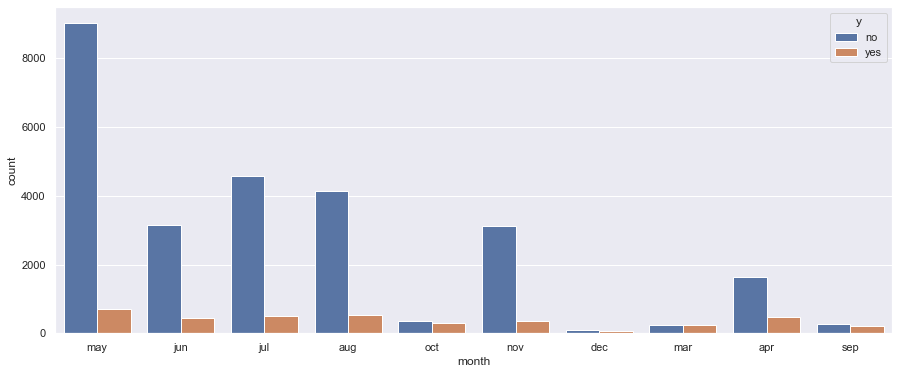

Day_Of_Week


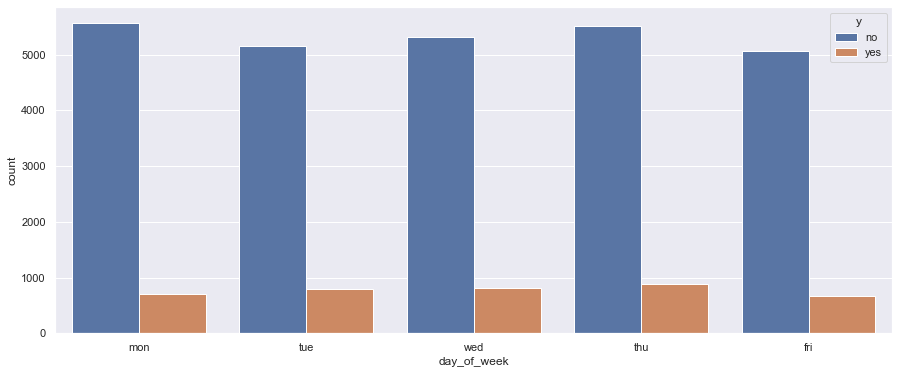

Poutcome


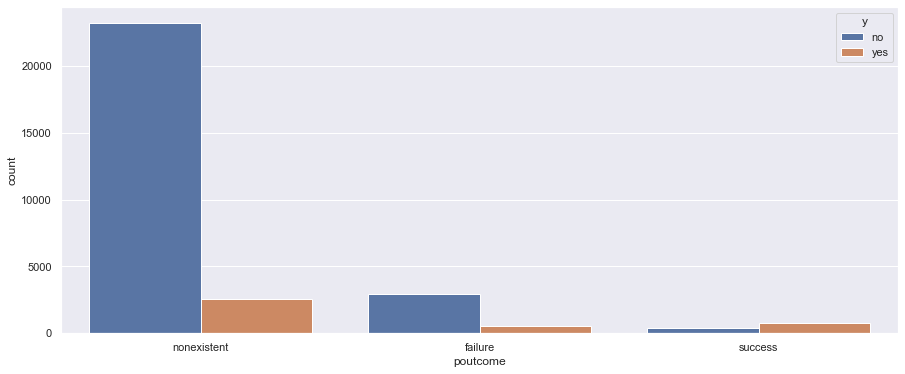

In [19]:
# Checking the distributions in relation to the target variable
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = df[column], hue=df["y"])
    plt.show()

**Insights from categorical variables (based on univariate analysis)**

    1. Job: Alot of application are from admin type of job.
    2. Default: Default variable has no impact on the client subscribing for term deposit. As we can see with no as input client took the term deposit and client having credit are not taking term deposit. So we will drop this feature.
    3. Marital: Around 60% of client were approached were married. 
    4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well.
    5. Housing: Housing loan does not have much effect on the number of term deposit purchased.
    6. Loan: We approach around 84% of client with not having personal loan. 
    7. Contact: Around 64% calls are from cellular.
    8. Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August. 
    9. day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.
    10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

In [20]:
#Drop the duration (as it highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
duration = df["duration"]
df.drop(["duration"], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['duration']))

##### Numerical Variables

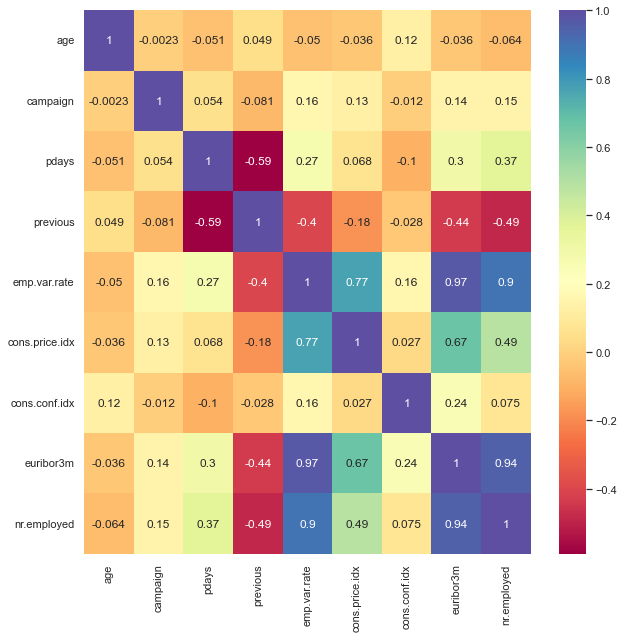

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

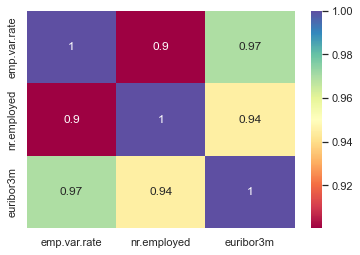

In [22]:
#Highly corr variables
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

There is Positive high correlation between:
<br>    'emp.var.rate' and 'nr.employed'
<br>    'emp.var.rate' and 'euribor3m'
<br>    'euribor3m' and 'nr.employed'

In [23]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Campaign


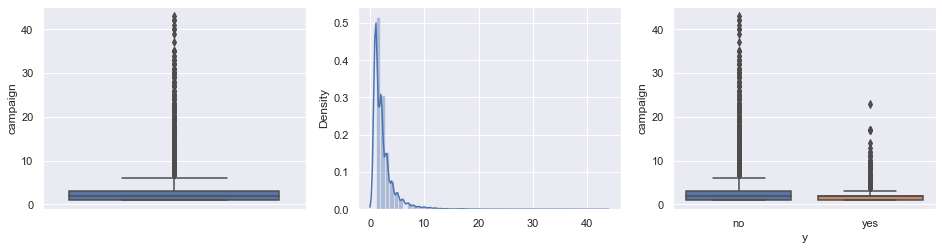

Age


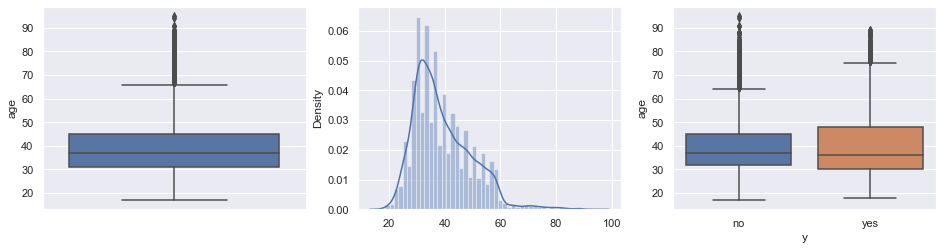

Euribor3M


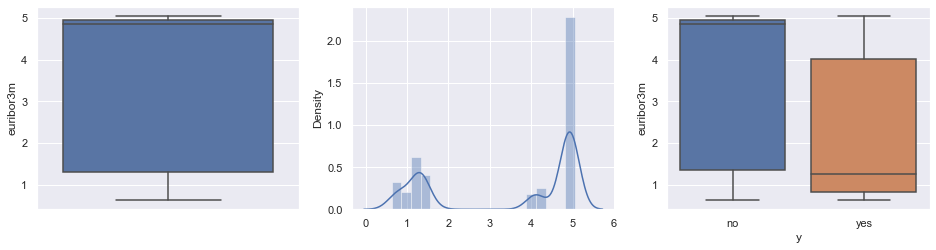

Pdays


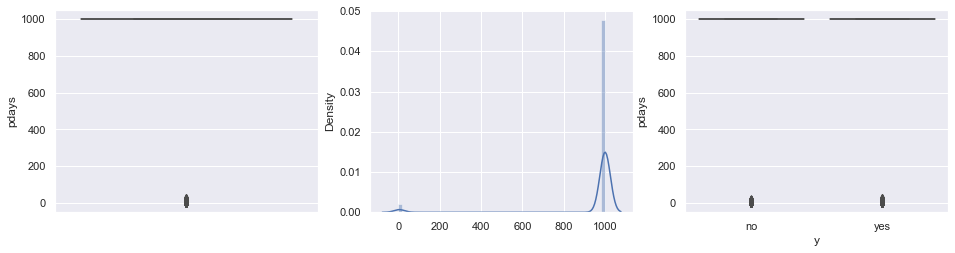

Cons.Conf.Idx


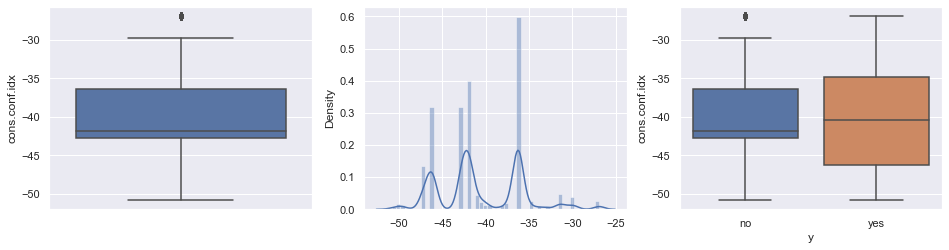

Previous


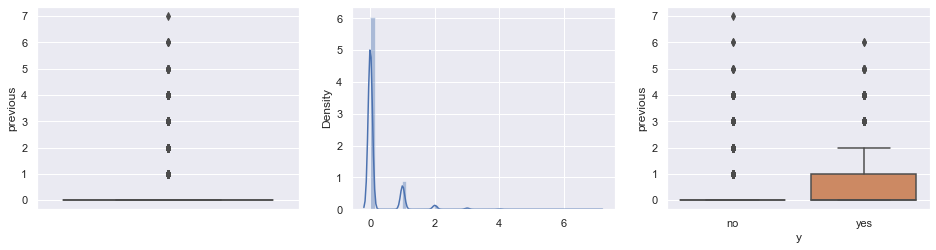

Cons.Price.Idx


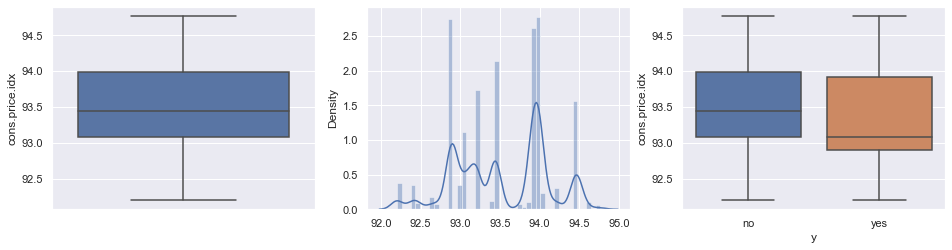

In [24]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = df[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = df["y"], y = df[column])
    i += 1
    plt.show()

In [25]:
df[var_numerical].describe()

,campaign,age,euribor3m,pdays,cons.conf.idx,previous,cons.price.idx
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,2.521721,39.029694,3.459976,956.318295,-40.602579,0.194337,93.523376
std,2.720495,10.332746,1.777215,201.404843,4.788790,0.522862,0.585366
min,1.000000,17.000000,0.634000,0.000000,-50.800000,0.000000,92.201000
25%,1.000000,31.000000,1.313000,999.000000,-42.700000,0.000000,93.075000
50%,2.000000,37.000000,4.856000,999.000000,-41.800000,0.000000,93.444000
75%,3.000000,45.000000,4.961000,999.000000,-36.400000,0.000000,93.994000
max,43.000000,95.000000,5.045000,999.000000,-26.900000,7.000000,94.767000


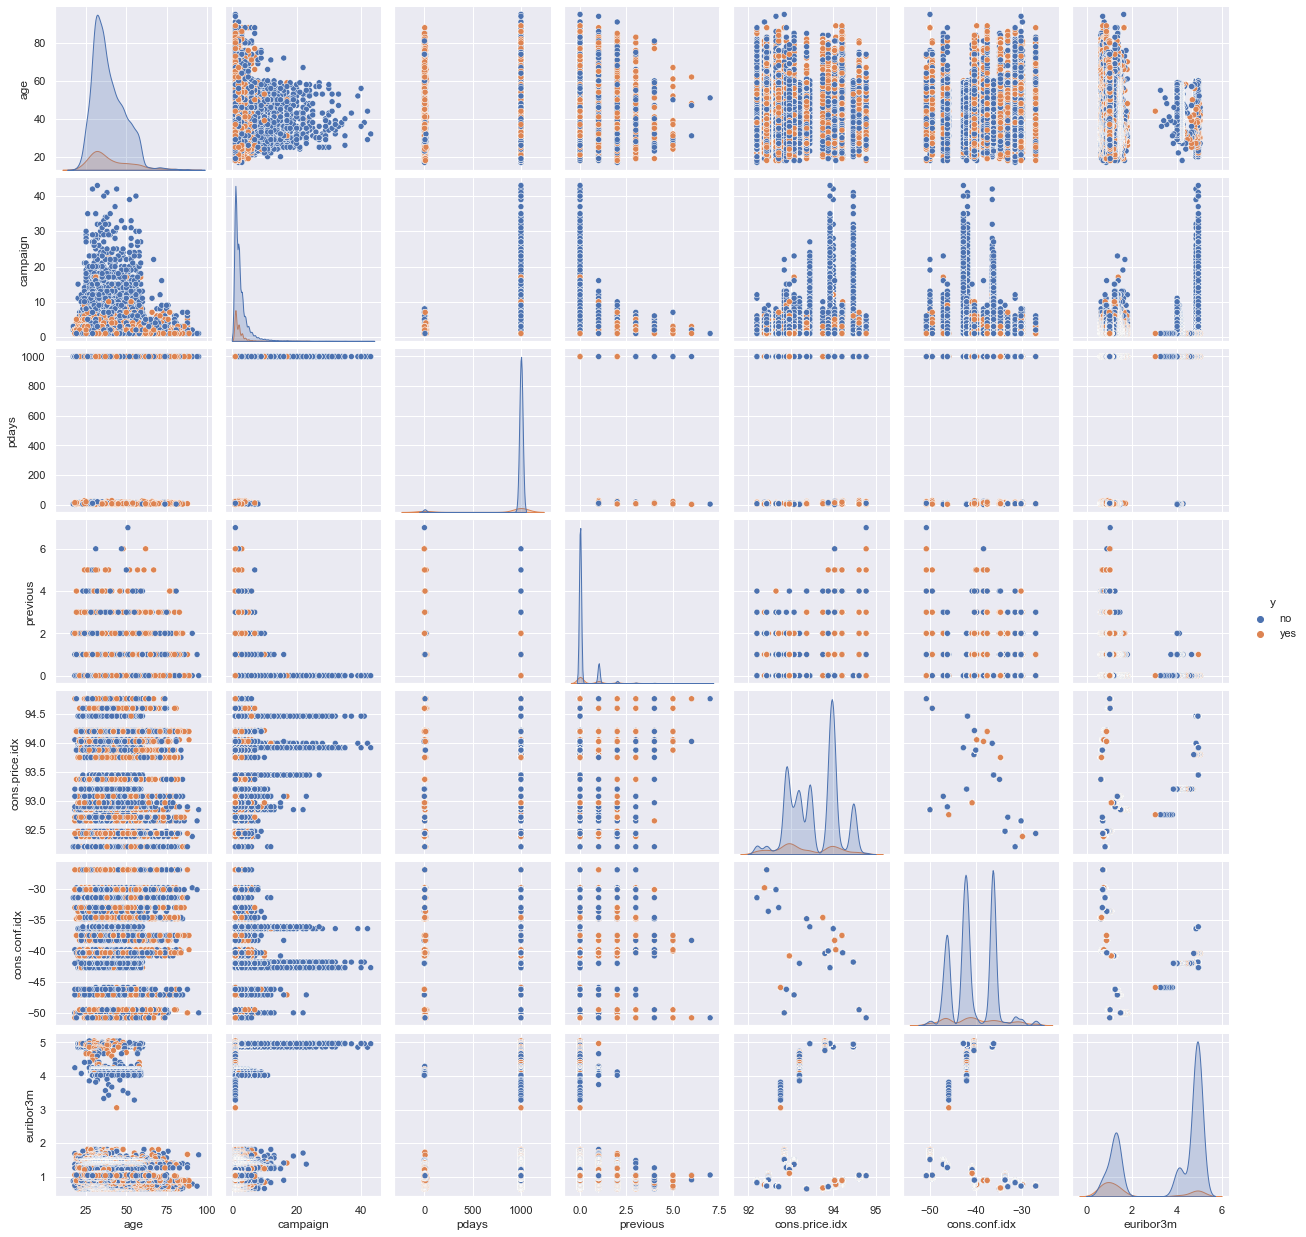

In [26]:
# visualizing numerical columns
sns.pairplot(hue='y', data = df)
plt.show()

 <br> **Insights from continuous variables**
<br>
<br>
    1. Campaign: If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
    **We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.**<br>
    2. Consumer price index: If this value is high then probability of client not subscribing is slightly higher. <br>
    3. Previous: If we contact client before a campaign then there is high chances that client will subscribe. We converted all the values above 2 to 2 based on the given data
    <br>
    4. Euribor 3 month rate: If this rate is high there is high chances of clients not subscribing to term deposit.<br>
    5. Pdays: If we start contacting client 1 month before campaign there is high probability of that client subscribing.

### Encoding categorical data with one hot encoding

In [27]:
contact = pd.get_dummies(df.contact, drop_first=True)
poutcome = pd.get_dummies(df.poutcome, drop_first=True)
job = pd.get_dummies(df.job, drop_first=True)
month = pd.get_dummies(df.month, drop_first=True)
marital = pd.get_dummies(df.marital, drop_first=True)
day_of_week = pd.get_dummies(df.day_of_week, drop_first=True)
education = pd.get_dummies(df.education, drop_first=True)

In [29]:
varlist = ['loan', 'housing', 'y']

df[varlist] = df[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

In [31]:
#Adding the encoded columns
df = pd.concat([df, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,jul,jun,mar,may,nov,oct,sep,married,single,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,no,0,0,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,37,services,married,high.school,no,1,0,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,0,0,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,no,0,1,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
6,59,admin.,married,professional.course,no,0,0,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [32]:
# Dropping columns that we have concatenated the dummies in our original dataframe
df.drop(['contact',"default", 'poutcome' , 'job', 'month', 'marital', 'day_of_week','education'], axis = 1, inplace = True)
df.head()

,age,housing,loan,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,aug,dec,jul,jun,mar,may,nov,oct,sep,married,single,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,1,999,0,93.994,-36.4,4.857,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,37,1,0,1,999,0,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,40,0,0,1,999,0,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,56,0,1,1,999,0,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
6,59,0,0,1,999,0,93.994,-36.4,4.857,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


## Modeling

In [35]:
y = df["y"]

In [37]:
X = df.drop(columns =["y"])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [43]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(X_train, y_train)
pred1 = gn.predict(X_test)
accuracy_score(pred1,y_test)

0.8597112860892389

In [45]:
#trying it with decisiontree
from sklearn.tree import DecisionTreeClassifier
tr =DecisionTreeClassifier()
tr.fit(X_train,y_train)
pred2 = tr.predict(X_test)
accuracy_score(pred2,y_test)

0.8257217847769028

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred4 = tr.predict(X_test)
accuracy_score(pred4,y_test)

0.8257217847769028

In [54]:
#Scaling the X features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transformed = ss.fit_transform(X_train)
X_test_transformed = ss.transform(X_test)

In [55]:
#Trying it using naive bayes Gaussian on scaled data
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(X_train_transformed, y_train)
pred1 = gn.predict(X_test_transformed)
accuracy_score(pred1,y_test)

0.8599737532808399